In [1]:
import pandas as pd
import main

In [2]:
real_top = pd.read_csv('real_data_test\\top_df.csv', delimiter=';')
real_top = real_top.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_top['X']
del real_top['Y']
real_top['WELL_NAME_UWI'] = real_top['WELL_NAME_UWI'].astype('str')
real_top.head(n=2)

,WELL_NAME_UWI,DEPTH_TOP
0,100,2548.81
1,101,2556.23


In [3]:
real_bottom = pd.read_csv('real_data_test\\bottom_df.csv', delimiter=';')
real_bottom = real_bottom.rename(columns={'WELL_NAME': 'WELL_NAME_UWI'})
del real_bottom['X']
del real_bottom['Y']
real_bottom['WELL_NAME_UWI'] = real_bottom['WELL_NAME_UWI'].astype('str')
real_bottom.head(n=2)

,WELL_NAME_UWI,DEPTH_BOTTOM
0,100,2564.81
1,101,2571.71


In [4]:
# данные от организаторов
water_content_data = pd.read_csv(main.data_dir + "\\water_content.csv", delimiter=';')
water_content_data = water_content_data.rename(columns={'Скважина': main.keys_dict[main.kid_well]})
water_content_data = water_content_data.rename(columns={' Начальная обводненность ': 'WC'})
water_content_data = water_content_data.rename(columns={'Дата запуска': 'date_start'})
del water_content_data['date_start']
water_content_data = water_content_data.rename(columns={'well_name': 'WELL_NAME'})
water_content_data.head(n=5)
water_content_data['WELL_NAME'] = water_content_data['WELL_NAME'].astype('str')
water_content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
WELL_NAME    181 non-null object
WC           181 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [5]:
print(len(water_content_data['WELL_NAME'].value_counts()))

180


In [6]:
las_out_file_name = 'AllGisParams\\fake_gis_las_all_out.csv'
global_data = pd.read_csv(las_out_file_name, delimiter=';')
global_data['WELL_NAME'] = global_data['WELL_NAME'].astype('str')
global_data['WELL_NAME_UWI'] = global_data['WELL_NAME_UWI'].astype('str')

In [7]:
#params_name = ['KINT', 'R05', 'R20', 'R14', 'R10', 'F07', 'F10', 'F14', 'R07', 'F20', 'F05', 'PHIT', 'MRES', 'SG', 'KGL', 'SXWB', 'GZ3', 'NPHI', 'GZ2', 'GZ4', 'GZ1', 'CILD', 'PROX', 'LLD', 'GZ7', 'APS', 'KPS', 'GZ5']
#params_name = ['CILD', 'GZ7', 'KINT']
#params_name = ['KINT', 'R05', 'R20', 'R14', 'R10', 'F07', 'F10', 'F14', 'R07', 'F20', 'F05', 'PHIT', 'MRES', 'SG', 'KGL', 'SXWB', 'GZ3', 'NPHI', 'GZ2', 'GZ4', 'GZ1', 'CILD', 'PROX', 'LLD', 'GZ7', 'GR:2', 'GR:1', 'APS', 'KPS', 'GZ5', 'SP:1', 'SP:2', 'W:1', 'W:2', 'NKTM:2', 'NKTM:1', 'CFTC:1', 'CFTC:2', 'MLM:2', 'MLM:1', 'RT:1', 'RT:2', 'GR:3']
#params_name = ['R05', 'R14']
params_name = ['CILD']

In [ ]:
#param = 'KINT'
# las_data = global_data[['WELL_NAME', 'WELL_NAME_UWI', 'DEPT', param]].copy()
# las_data['WELL_NAME'] = las_data['WELL_NAME'].astype('str')
# las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')
# las_data = las_data.dropna()

In [73]:
# объединение данных по всем параметрам
min_count_val_in_data = 100
count_val = 400


# Загружаем данные по параметру
# las_gis_file_name = 'AllGisParams\\fake_gis_las_' + param_name_file +  '_out.csv'
# las_data = pd.read_csv(las_gis_file_name, delimiter=';', low_memory=False)
print('Start union table')
all_params = ['WELL_NAME', 'WELL_NAME_UWI', 'DEPT']
all_params.extend(params_name)
las_data = global_data[all_params].copy()
las_data['WELL_NAME'] = las_data['WELL_NAME'].astype('str')
las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')
las_data.head(n=5)

# Объединяем данные
real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI')
real_data_na = real_data.dropna()
# нормализуем
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print('real, min = ', real_data_na[params_name].min(), ' max = ', real_data_na[params_name].max())
#real_data_na[params_name] = scaler.fit_transform(real_data_na[params_name])
print('scaler, min = ', real_data_na[params_name].min(), ' max = ', real_data_na[params_name].max())
print(len(real_data['WELL_NAME'].value_counts()))

# Преобразуем в данные для обучения
dev_path = "..\\tasks\\task 6\\data\\dev\\"
well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()

x_values = []
for param in params_name:
    params_name_file = (param.replace(':','')).lower()
    print('Convert ', param, 'start')

#     [x_values_temp, y_values, y_names] = main.ConvertDataToLearningByStdParams(real_data_na, param, dev_path,
#                                                            min_count_val_in_data)
    [x_values_temp, y_values, y_names, top_values, bottom_values] = main.ConvertDataToLearning(real_data_na, param, dev_path,
                                                               min_count_val_in_data, count_val)
    if (len(x_values) > 0):
        for src, res in zip(x_values_temp, x_values):
            res.extend(src)
            #print('res = ',len(res), 'src = ', len(src))
    else:
        x_values = x_values_temp.copy()
                
    print('length =', len(x_values), len(y_values), len(x_values[0]))
    


# # обучаем дерево
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, cross_val_score

# forest = RandomForestRegressor(n_estimators=10, n_jobs=---1, random_state=17) # n_jobs=-1
# # print(np.mean(cross_val_score(forest, x_hold, y_hold, cv=6))) # 0.949


# forest_params = { 
#     'max_depth': [1, 10, 20, 40, 60],
#     'n_estimators': [1, 10, 30, 50, 100, 200, 500],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# print('Start', param, ' learning')
# forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
# forest_grid.fit(x_train, y_train) 
# print('Convert all_params end')
# print(len(x_values))

Start union table
real, min =  CILD   -10000.0
dtype: float64  max =  CILD    667.0
dtype: float64
scaler, min =  CILD   -10000.0
dtype: float64  max =  CILD    667.0
dtype: float64
157
Convert  CILD start
0  of  156
20  of  156
40  of  156
60  of  156
80  of  156
100  of  156
120  of  156
140  of  156
end ConvertDataToLearning
length = 151 151 400


In [79]:
real_data_na[params_name].min()

CILD   -10000.0
dtype: float64

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score

y_values_r = y_values
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values_r, test_size=0.3, random_state=17)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

forest_reg =  RandomForestRegressor(n_estimators=10,
                           random_state=17)
# oob_score=True,

from sklearn.model_selection import GridSearchCV, cross_val_score
forest_params = { 
    'max_depth': [1, 10, 20, 40, 60, 100, 200, 500],
    'n_estimators': [1, 10, 30, 50, 70, 100, 150, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}
forest_grid = GridSearchCV(forest_reg, forest_params, cv=5, n_jobs=-1, verbose=True)
value_fit = forest_grid.fit(x_train, y_train) 
y_predict = forest_grid.predict(x_hold)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.4min finished


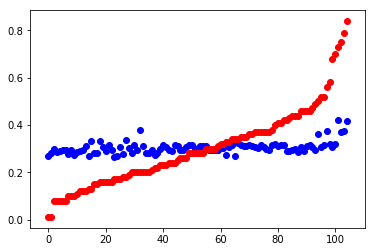

MSE                      = 0.0233664135556
MAE                      = 0.12255405732
r2_score                 = 0.168808917467    (best_value is 1)
explained_variance_score = 0.169191280339    (best_value is 1)


In [11]:
y_predict = forest_grid.predict(x_train)
predict_for_analize_fake = pd.DataFrame({'y_hold':y_train, 'y_predict':y_predict})
data_analize_func(predict_for_analize_fake)
#predict_for_analize_fake.to_csv('AllGisParams/result_predict_sum.csv',index=False, sep = ';')

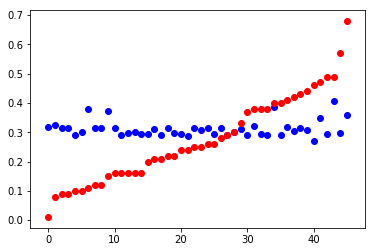

MSE                      = 0.0227550102469
MAE                      = 0.12728727582
r2_score                 = -0.0439164357495    (best_value is 1)
explained_variance_score = 0.0164829072828    (best_value is 1)


In [12]:
y_predict = forest_grid.predict(x_hold)
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict})
data_analize_func(predict_for_analize_fake)

In [13]:
print(len(bottom_values), len(y_names), len(y_values), len(x_values))

151 151 151 151


529
x_real =  172
x_calc =  400
wc =  0.37


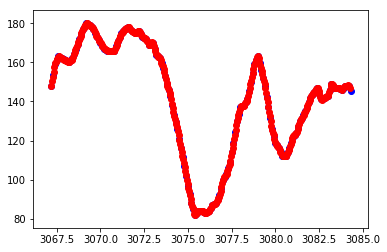

In [85]:
well_i = 4
print(y_names[well_i])
bottom = bottom_values[well_i]
top = top_values[well_i]
data_well = real_data_na[real_data_na['WELL_NAME'] == y_names[well_i]]
data_well_by_bound = data_well[(data_well['DEPT'] >= top) & (data_well['DEPT'] <= bottom)]
x_real = data_well_by_bound['CILD'].tolist()
y_real = data_well_by_bound['DEPT'].tolist()
h_start = data_well_by_bound['DEPT'].min()
h_end = data_well_by_bound['DEPT'].max()
h_step = (h_end - h_start) / count_val
x_values_h = []
i = 0
while (i < count_val):
    x_values_h.append(h_start + i * h_step)
    i = i + 1
# построение графиков
print('x_real = ', len(x_real))
print('x_calc = ', len(x_values[well_i]))
print('wc = ', y_values[well_i])
plt.scatter(y_real, x_real, color = 'blue')
plt.scatter(x_values_h, x_values[well_i], color = 'red')
plt.show()

In [94]:
real_data_na[real_data_na['CILD'] == -10000]

,WELL_NAME,WC,WELL_NAME_UWI,DEPT,CILD,DEPTH_TOP,DEPTH_BOTTOM
3185065,398,0.12,186,2724.2,-10000.0,2570.94,2589.93
3185066,398,0.12,186,2724.3,-10000.0,2570.94,2589.93
3185067,398,0.12,186,2724.4,-10000.0,2570.94,2589.93
3185068,398,0.12,186,2724.5,-10000.0,2570.94,2589.93
3185069,398,0.12,186,2724.6,-10000.0,2570.94,2589.93
3185070,398,0.12,186,2724.7,-10000.0,2570.94,2589.93
3185071,398,0.12,186,2724.8,-10000.0,2570.94,2589.93
3185072,398,0.12,186,2724.9,-10000.0,2570.94,2589.93
3185073,398,0.12,186,2725.0,-10000.0,2570.94,2589.93
3185074,398,0.12,186,2725.1,-10000.0,2570.94,2589.93


In [ ]:
# построение гистограмы входных данных
import matplotlib.pyplot as plt
# построение графиков

frame_tr = pd.DataFrame(y_hold, columns = ['wc'])
plt_tr = frame['wc'].plot.hist()
plt_tr.figure

In [ ]:
# проверка по каждому параметру
params_name = ['KINT', 'R05', 'R20', 'R14', 'R10', 'F07', 'F10', 'F14', 'R07', 'F20', 'F05', 'PHIT', 'MRES', 'SG', 'KGL', 'SXWB', 'GZ3', 'NPHI', 'GZ2', 'GZ4', 'GZ1', 'CILD', 'PROX', 'LLD', 'GZ7', 'APS', 'KPS', 'GZ5']
#params_name = ['R10']
result_mse = {}.fromkeys(params_name, 0)
result_mae= {}.fromkeys(params_name, 0)
result_r2 = {}.fromkeys(params_name, 0)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
count_val = 500
min_count_val_in_data = 10
for param in params_name:
    print('Convert ', param, 'start')
    param_name_file = (param.replace(':','')).lower()
    # Загружаем данные по параметру
    # las_gis_file_name = 'AllGisParams\\fake_gis_las_' + param_name_file +  '_out.csv'
    # las_data = pd.read_csv(las_gis_file_name, delimiter=';', low_memory=False)
    las_data = global_data[['WELL_NAME', 'WELL_NAME_UWI', 'DEPT', param]].copy()
    las_data['WELL_NAME'] = las_data['WELL_NAME'].astype('str')
    las_data['WELL_NAME_UWI'] = las_data['WELL_NAME_UWI'].astype('str')
    las_data.head(n=5)
    
    # Объединяем данные
    real_data = pd.merge(water_content_data, las_data, on='WELL_NAME')
    real_data = pd.merge(real_data, real_top, on='WELL_NAME_UWI')
    real_data = pd.merge(real_data, real_bottom, on='WELL_NAME_UWI')
    real_data_na = real_data.dropna()
    print(len(real_data['WELL_NAME'].value_counts()))
    
    if (param == 'CILD'):
        real_data_na = real_data_na[real_data_na[param] > 0] 
    
    # Преобразуем в данные для обучения
    dev_path = "..\\tasks\\task 6\\data\\dev\\"
    well_name_list = real_data_na['WELL_NAME_UWI'].value_counts().index.tolist()
#     [x_values, y_values, y_names] = main.ConvertDataToLearningStatParamsWithDiff(real_data_na, param, dev_path,
#                                                                min_count_val_in_data, count_val)
#     [x_values, y_values, y_names] = main.ConvertDataToLearningByStdParams(real_data_na, param, dev_path,
#                                                                           min_count_val_in_data)
    [x_values, y_values, y_names] = main.ConvertDataToLearningByStdParams(real_data_na, param, dev_path, min_count_val_in_data)
    
    # y_values_r = [int(10 * y_val) for y_val in y_values]
    y_values_r = y_values
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.metrics import accuracy_score
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.cross_validation import cross_val_score

    x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values_r, test_size=0.3, random_state=17)
    # обучаем дерево
    # from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    
    from sklearn.model_selection import GridSearchCV, cross_val_score
    forest = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=17)
    forest_params = { 
        # 'max_depth': [1, 2, 3, 5, 10, 20, 40, 60],
        'max_depth': [1, 2, 3, 5, 7, 10],
        'n_estimators': [1, 10, 30, 50, 100, 200, 500],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    print('Start', param, ' learning')
    from sklearn.model_selection import LeaveOneOut
    #loo = LeaveOneOut()
    forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
    forest_grid.fit(x_train, y_train) 
     #result_fit = accuracy_score(y_hold, forest_grid.predict(x_hold))
    print('best_params', forest_grid.best_params_)
    y_predict = forest_grid.predict(x_hold) 
    
#     from sklearn.ensemble import GradientBoostingRegressor
#     boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, 
#                                            max_depth=2, random_state=17, loss='ls')
#     boost.fit(x_train, y_train)
#     y_predict = boost.predict(x_hold) 
    # print(np.mean(cross_val_score(forest, x_hold, y_hold, cv=6))) # 0.949
    
   
    mse = mean_squared_error(y_hold, y_predict)
    mae = mean_absolute_error(y_hold, y_predict)
    # r2_score =  r2_score(y_hold, y_predict)

    result_mse[param] = mse
    result_mae[param] = mae
    #result_r2[param] = r2_score
    print('result_mae = ', 100. * mae)
    print('Convert', param, 'end')
print('End calculate, l_values_len = ', len(x_values))

In [ ]:
predict_for_analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict})
data_analize_func(predict_for_analize_fake)
#predict_for_analize_fake.to_csv('AllGisParams/result_predict_sum_r05.csv',index=False, sep = ';')

In [ ]:
predict_for_analize_mae = pd.DataFrame(list(result_mae.items()), columns=['Param', 'Mae'])
predict_for_analize_mae.to_csv('AllGisParams/result_mae_diff(std_param).csv',index=False, sep = ';')
predict_for_analize_mse = pd.DataFrame(list(result_mse.items()), columns=['Param', 'Mse'])
predict_for_analize_mse.to_csv('AllGisParams/result_mse_diff(std_param).csv',index=False, sep = ';')

In [ ]:
#result_learning.items()
result_data = pd.DataFrame(list(result_learning.items()), columns=['Param', 'Result'])

In [ ]:
result_data.to_csv('AllGisParams/result_learning_std.csv',index=False, sep = ';')

In [ ]:
# Создаем DataFrame
# x_names = ['idx' + str(i) for i in range(len(x_values[0]))]
# data_x_values = pd.DataFrame(x_values, columns = x_names)
# data_y_values = pd.DataFrame(y_values, columns=['wc'])
# data_names = pd.DataFrame(y_names, columns=['WELL_NAME'])
# len(data_x_values)
# data_values = pd.merge(data_y_values, data_names, left_index=True, right_index=True)
# data_values = pd.merge(data_values, data_x_values, left_index=True, right_index=True)

In [ ]:
data_values.head()